In [21]:
import cv2
import numpy as np
import json

import matplotlib.pyplot as plt

In [22]:
img_path = 'camera_21334181_90.jpg'
img_bgr = cv2.imread(img_path)

labelme_path = 'camera_21334181_90.json'
with open(labelme_path, 'r', encoding='utf-8') as f:
    labelme = json.load(f)

In [23]:
# 框（rectangle）可视化配置
bbox_color = (255, 129, 0)           # 框的颜色
bbox_thickness = 5                   # 框的线宽

# 框类别文字
bbox_labelstr = {
    'font_size':3,         # 字体大小
    'font_thickness':8,   # 字体粗细
    'offset_x':0,          # X 方向，文字偏移距离，向右为正
    'offset_y':-80,       # Y 方向，文字偏移距离，向下为正
}

In [24]:
for each_ann in labelme['shapes']: # 遍历每一个标注

    if each_ann['shape_type'] == 'rectangle': # 筛选出框标注

        # 框的类别
        bbox_label = each_ann['label']
        # 框的两点坐标
        bbox_keypoints = each_ann['points']
        bbox_keypoint_A_xy = bbox_keypoints[0]
        bbox_keypoint_B_xy = bbox_keypoints[1]
        # 左上角坐标
        bbox_top_left_x = int(min(bbox_keypoint_A_xy[0], bbox_keypoint_B_xy[0]))
        bbox_top_left_y = int(min(bbox_keypoint_A_xy[1], bbox_keypoint_B_xy[1]))
        # 右下角坐标
        bbox_bottom_right_x = int(max(bbox_keypoint_A_xy[0], bbox_keypoint_B_xy[0]))
        bbox_bottom_right_y = int(max(bbox_keypoint_A_xy[1], bbox_keypoint_B_xy[1]))

        # 画矩形：画框
        img_bgr = cv2.rectangle(img_bgr, (bbox_top_left_x, bbox_top_left_y), (bbox_bottom_right_x, bbox_bottom_right_y), bbox_color, bbox_thickness)

        # 写框类别文字：图片，文字字符串，文字左上角坐标，字体，字体大小，颜色，字体粗细
        img_bgr = cv2.putText(img_bgr, bbox_label, (bbox_top_left_x+bbox_labelstr['offset_x'], bbox_top_left_y+bbox_labelstr['offset_y']), cv2.FONT_HERSHEY_SIMPLEX, bbox_labelstr['font_size'], bbox_color, bbox_labelstr['font_thickness'])

In [25]:
# 关键点配色
radius = 15
kpt_color_map = {
    'scroll_top':{'id':0, 'color':[255,0,0], 'radius':radius, 'thickness':-1},
    'nut_l':{'id':1, 'color':[0,255,0], 'radius':radius, 'thickness':-1},
    'nut_r':{'id':2, 'color':[0,0,255], 'radius':radius, 'thickness':-1},
    'bridge_l':{'id':2, 'color':[125,0,0], 'radius':radius, 'thickness':-1},
    'bridge_r':{'id':2, 'color':[0,125,0], 'radius':radius, 'thickness':-1},
    'neck_bottom_l':{'id':2, 'color':[0,125,125], 'radius':radius, 'thickness':-1},
    'neck_bottom_r':{'id':2, 'color':[125,0,125], 'radius':radius, 'thickness':-1},
    'tail_gut':{'id':2, 'color':[125,125,125], 'radius':radius, 'thickness':-1},
    'end_pin':{'id':2, 'color':[200,80,255], 'radius':radius, 'thickness':-1},
    'tip_plate':{'id':2, 'color':[250,50,120], 'radius':radius, 'thickness':-1},
    'frog':{'id':2, 'color':[70,0,80], 'radius':radius, 'thickness':-1},
}

# 点类别文字
kpt_labelstr = {
    'font_size':1.5,             # 字体大小
    'font_thickness':4,       # 字体粗细
    'offset_x':-15,             # X 方向，文字偏移距离，向右为正
    'offset_y':50,            # Y 方向，文字偏移距离，向下为正
}

In [26]:
for each_ann in labelme['shapes']: # 遍历每一个标注

    if each_ann['shape_type'] == 'point': # 筛选出关键点标注

        kpt_label = each_ann['label'] # 该点的类别

        # 该点的 XY 坐标
        kpt_xy = each_ann['points'][0]
        kpt_x, kpt_y = int(kpt_xy[0]), int(kpt_xy[1])

        # print(kpt_label)
        # 该点的可视化配置
        kpt_color = kpt_color_map[kpt_label]['color']         # 颜色
        kpt_radius = kpt_color_map[kpt_label]['radius']       # 半径
        kpt_thickness = kpt_color_map[kpt_label]['thickness'] # 线宽（-1代表填充）

        # 画圆：画该关键点
        img_bgr = cv2.circle(img_bgr, (kpt_x, kpt_y), kpt_radius, kpt_color, kpt_thickness)

        # 写该点类别文字：图片，文字字符串，文字左上角坐标，字体，字体大小，颜色，字体粗细
        img_bgr = cv2.putText(img_bgr, kpt_label, (kpt_x+kpt_labelstr['offset_x'], kpt_y+kpt_labelstr['offset_y']), cv2.FONT_HERSHEY_SIMPLEX, kpt_labelstr['font_size'], kpt_color, kpt_labelstr['font_thickness'])

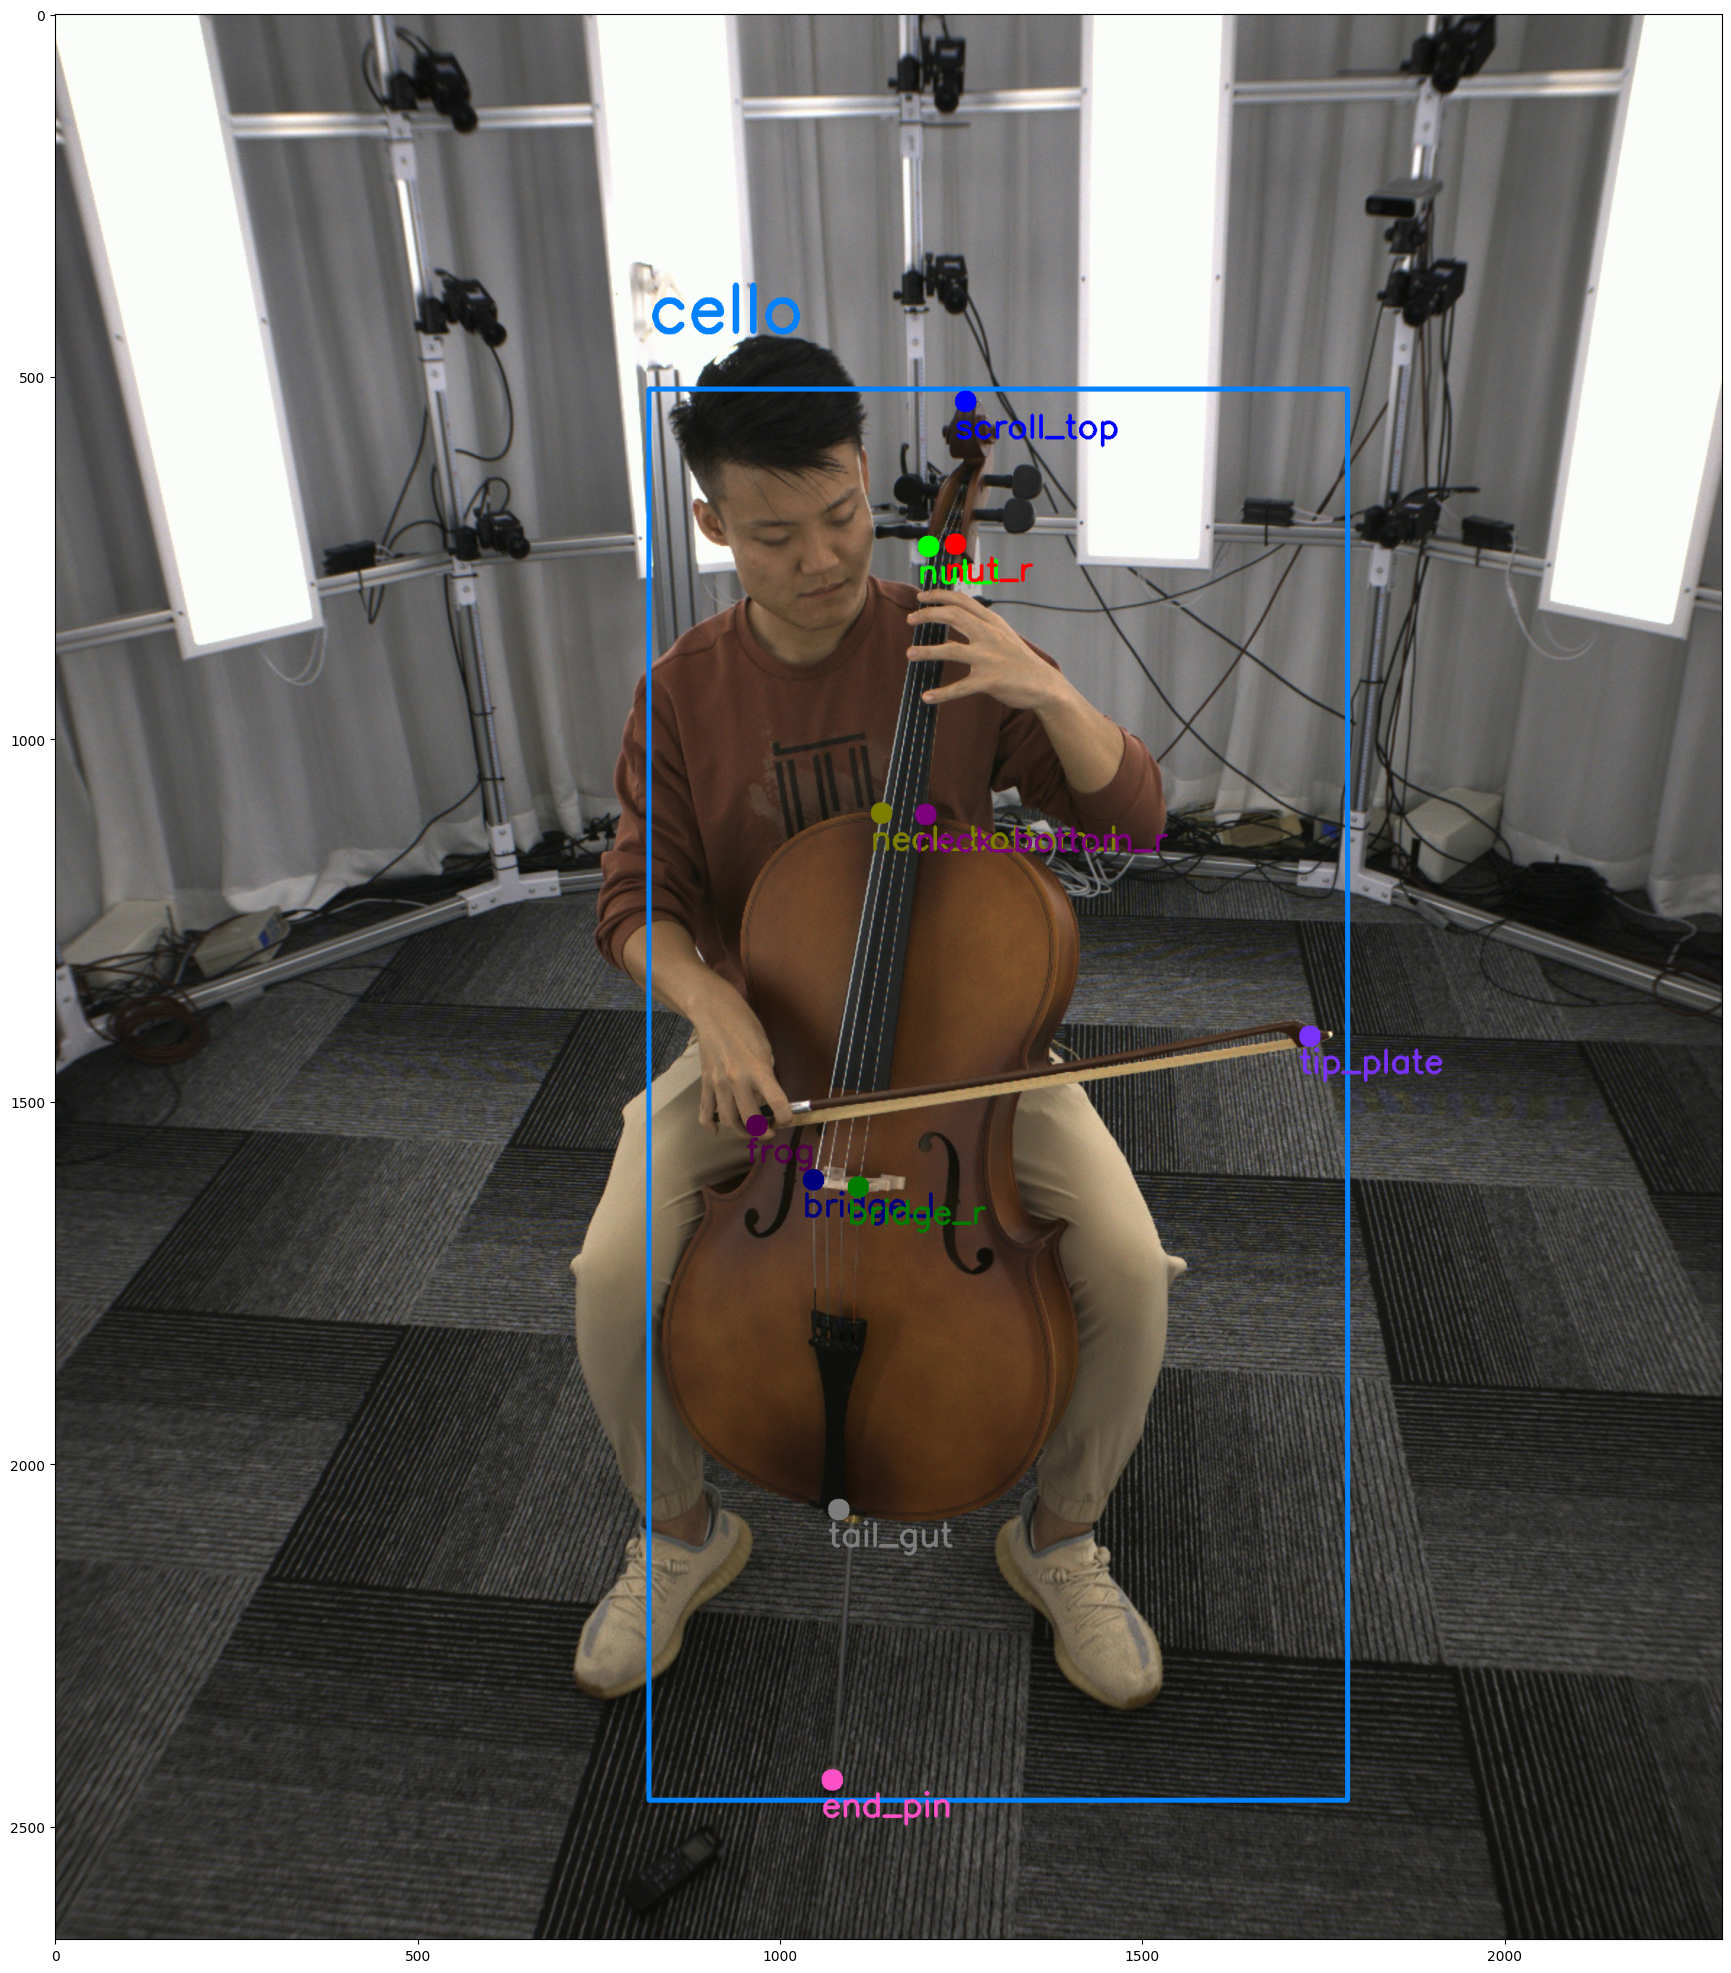

In [27]:
plt.figure(figsize=(23,25))
plt.imshow(img_bgr[:,:,::-1])
plt.savefig('cello_kp.png')
plt.show()